## Import

In [1]:
import mlflow
import mlflow.keras
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

## MLFlow Settings

In [121]:
mlflow.set_tracking_uri("http://localhost:5000")

## Temperature

In [2]:
df_temp = pd.read_csv(r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\Temperature_DEC23_1-15.csv") 
df_temp['Value'] = df_temp['Value'].str.replace(",", ".")
df_temp['Value'] = df_temp['Value'].astype(float)
df_temp['DateTime'] = pd.to_datetime(df_temp['DateTime'])
# df_temp['Data'] = pd.to_datetime(df_temp['DateTime'].dt.date)
# df_temp['Orario'] = df_temp['DateTime'].dt.time
# df_temp = df_temp.drop("DateTime", axis=1)
df_temp = df_temp.reindex(columns=df_temp.columns[::-1])
df_temp.set_index(df_temp['DateTime'], inplace=True)
# df_temp = df_temp[['Data', 'Orario', 'TagName', 'Value', 'DateTime']]

df_temp.head(20)  

TagName  Value                DateTime
DateTime                                                                    
2023-12-01 00:00:00.000  Temperature_NCD10.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD9.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD8.Cv  18.53 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD7.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD6.Cv  17.97 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD5.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD4.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD3.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD2.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Temperature_NCD1.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:03.838   Temperature_NCD6.Cv  17.99 2023-12-01 00:00:03.838
2023-12-01 00:01:49.833   Temperature_NCD8.Cv  18.54 2023-12-01 00:01:49.833
2023-12-01 00:02:01.831   Temperature_NCD8.Cv  18.50 2023-12-01 00:02:01.831
2023-12-01 00:02:06.833   Temperature_NCD8.Cv  18.58 2023-12-01 00:02:06.833
2023-12-01 00:02:11.838   Temperature_NCD8.Cv  18.57 2023-12-01 00:02:11.838
2023-12-01 00:02:16.834   Temperature_NCD8.Cv  18.55 2023-12-01 00:02:16.834
2023-12-01 00:02:31.835   Temperature_NCD8.Cv  18.40 2023-12-01 00:02:31.835
2023-12-01 00:02:46.831   Temperature_NCD8.Cv  18.54 2023-12-01 00:02:46.831
2023-12-01 00:03:04.829   Temperature_NCD6.Cv  17.97 2023-12-01 00:03:04.829
2023-12-01 00:03:13.830   Temperature_NCD6.Cv  17.93 2023-12-01 00:03:13.830

In [3]:
df_resampled_temp = df_temp.resample("30T").mean(numeric_only=True)
df_resampled_temp.head(30)

Value
DateTime                      
2023-12-01 00:00:00  17.500690
2023-12-01 00:30:00  18.315000
2023-12-01 01:00:00  18.393046
2023-12-01 01:30:00  18.319465
2023-12-01 02:00:00  18.398039
2023-12-01 02:30:00  18.391290
2023-12-01 03:00:00  18.458715
2023-12-01 03:30:00  18.419367
2023-12-01 04:00:00  18.431677
2023-12-01 04:30:00  18.461071
2023-12-01 05:00:00  18.497333
2023-12-01 05:30:00  18.451006
2023-12-01 06:00:00  18.428372
2023-12-01 06:30:00  18.387692
2023-12-01 07:00:00  18.323555
2023-12-01 07:30:00  18.300000
2023-12-01 08:00:00  18.224718
2023-12-01 08:30:00  18.316301
2023-12-01 09:00:00  18.680636
2023-12-01 09:30:00  19.031729
2023-12-01 10:00:00  19.376052
2023-12-01 10:30:00  20.265081
2023-12-01 11:00:00  20.381660
2023-12-01 11:30:00  21.028381
2023-12-01 12:00:00  22.296449
2023-12-01 12:30:00  23.760541
2023-12-01 13:00:00  24.056828
2023-12-01 13:30:00  22.118095
2023-12-01 14:00:00  22.414826
2023-12-01 14:30:00  23.557205

In [4]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67266 entries, 2023-12-01 00:00:00 to 2023-12-07 17:47:53.646000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TagName   67266 non-null  object        
 1   Value     67266 non-null  float64       
 2   DateTime  67266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.1+ MB


<Axes: xlabel='DateTime'>

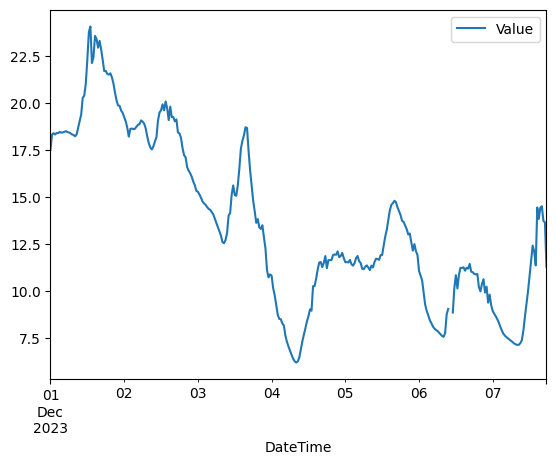

In [6]:
df_resampled_temp.plot()

In [5]:
df_temp.groupby('TagName')
print(df_temp.groupby('TagName').groups)

{'Temperature_NCD1.Cv': [2023-12-01 00:00:00, 2023-12-04 18:17:14.753000], 'Temperature_NCD10.Cv': [2023-12-01 00:00:00, 2023-12-04 18:17:14.753000], 'Temperature_NCD2.Cv': [2023-12-01 00:00:00, 2023-12-04 18:17:14.753000], 'Temperature_NCD3.Cv': [2023-12-01 00:00:00, 2023-12-04 18:17:14.753000], 'Temperature_NCD4.Cv': [2023-12-01 00:00:00, 2023-12-04 18:17:14.753000], 'Temperature_NCD5.Cv': [2023-12-01 00:00:00, 2023-12-04 18:17:14.753000], 'Temperature_NCD6.Cv': [2023-12-01 00:00:00, 2023-12-01 00:00:03.838000, 2023-12-01 00:03:04.829000, 2023-12-01 00:03:13.830000, 2023-12-01 00:03:29.832000, 2023-12-01 00:03:43.833000, 2023-12-01 00:03:49.834000, 2023-12-01 00:03:54.835000, 2023-12-01 00:03:59.831000, 2023-12-01 00:04:18.829000, 2023-12-01 00:04:29.831000, 2023-12-01 00:04:59.838000, 2023-12-01 00:05:04.835000, 2023-12-01 00:05:44.834000, 2023-12-01 00:05:49.835000, 2023-12-01 00:05:54.833000, 2023-12-01 00:05:59.831000, 2023-12-01 00:06:20.831000, 2023-12-01 00:06:31.832000, 2023-

In [7]:
unique_tags = df_temp['TagName'].unique()
print(unique_tags)

['Temperature_NCD10.Cv' 'Temperature_NCD9.Cv' 'Temperature_NCD8.Cv'
 'Temperature_NCD7.Cv' 'Temperature_NCD6.Cv' 'Temperature_NCD5.Cv'
 'Temperature_NCD4.Cv' 'Temperature_NCD3.Cv' 'Temperature_NCD2.Cv'
 'Temperature_NCD1.Cv']


In [8]:
dataframes_dict = {}
for tag in unique_tags:
    dataframes_dict[tag] = df_temp[df_temp['TagName'] == tag].drop(columns='TagName') 

In [ ]:
output_folder = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\temperatures"
for tag, df in dataframes_dict.items():
    filename = f"{tag}_data.csv"  # Nome del file CSV basato sul tag
    df.to_csv(rf"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\temperatures\{filename}", index=False)  # Salva il dataframe come file CSV

    print(f"Salvato il dataframe con tag '{tag}' in {filename}")

## Humidity

In [9]:
df_humidity = pd.read_csv(r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\Humidity_DEC23_1-15.csv") 
df_humidity['Value'] = df_humidity['Value'].str.replace(",", ".")
df_humidity['Value'] = df_humidity['Value'].astype(float)
df_humidity['DateTime'] = pd.to_datetime(df_humidity['DateTime'])
# df_temp['Data'] = pd.to_datetime(df_temp['DateTime'].dt.date)
# df_temp['Orario'] = df_temp['DateTime'].dt.time
# df_temp = df_temp.drop("DateTime", axis=1)
df_humidity = df_humidity.reindex(columns=df_humidity.columns[::-1])
df_humidity.set_index(df_humidity['DateTime'], inplace=True)
# df_temp = df_temp[['Data', 'Orario', 'TagName', 'Value', 'DateTime']]

df_humidity.head(20)  

TagName  Value                DateTime
DateTime                                                                 
2023-12-01 00:00:00.000   Humidity_NCD9.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD8.Cv  51.65 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD7.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD6.Cv  52.89 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD5.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD4.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD3.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD2.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000  Humidity_NCD10.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000   Humidity_NCD1.Cv   0.00 2023-12-01 00:00:00.000
2023-12-01 00:00:03.837   Humidity_NCD6.Cv  52.88 2023-12-01 00:00:03.837
2023-12-01 00:01:49.833   Humidity_NCD8.Cv  51.64 2023-12-01 00:01:49.833
2023-12-01 00:02:01.831   Humidity_NCD8.Cv  51.70 2023-12-01 00:02:01.831
2023-12-01 00:02:06.833   Humidity_NCD8.Cv  51.67 2023-12-01 00:02:06.833
2023-12-01 00:02:11.837   Humidity_NCD8.Cv  51.68 2023-12-01 00:02:11.837
2023-12-01 00:02:16.834   Humidity_NCD8.Cv  51.69 2023-12-01 00:02:16.834
2023-12-01 00:02:31.834   Humidity_NCD8.Cv  51.59 2023-12-01 00:02:31.834
2023-12-01 00:02:46.831   Humidity_NCD8.Cv  51.64 2023-12-01 00:02:46.831
2023-12-01 00:03:04.829   Humidity_NCD6.Cv  52.67 2023-12-01 00:03:04.829
2023-12-01 00:03:13.830   Humidity_NCD6.Cv  52.80 2023-12-01 00:03:13.830

In [10]:
df_resampled_humidity = df_humidity.resample("30T").mean(numeric_only=True)
df_resampled_humidity.head(30)

Value
DateTime                      
2023-12-01 00:00:00  50.194087
2023-12-01 00:30:00  51.788644
2023-12-01 01:00:00  51.348722
2023-12-01 01:30:00  50.833369
2023-12-01 02:00:00  50.247654
2023-12-01 02:30:00  49.972375
2023-12-01 03:00:00  49.811667
2023-12-01 03:30:00  49.770473
2023-12-01 04:00:00  49.800303
2023-12-01 04:30:00  49.876842
2023-12-01 05:00:00  49.665866
2023-12-01 05:30:00  49.377802
2023-12-01 06:00:00  48.871602
2023-12-01 06:30:00  48.396263
2023-12-01 07:00:00  47.730524
2023-12-01 07:30:00  46.712464
2023-12-01 08:00:00  45.650991
2023-12-01 08:30:00  44.758816
2023-12-01 09:00:00  44.177040
2023-12-01 09:30:00  43.308080
2023-12-01 10:00:00  42.604309
2023-12-01 10:30:00  42.157719
2023-12-01 11:00:00  41.321943
2023-12-01 11:30:00  40.585869
2023-12-01 12:00:00  39.405564
2023-12-01 12:30:00  37.944286
2023-12-01 13:00:00  36.953554
2023-12-01 13:30:00  40.050487
2023-12-01 14:00:00  39.040294
2023-12-01 14:30:00  37.006929

<Axes: xlabel='DateTime'>

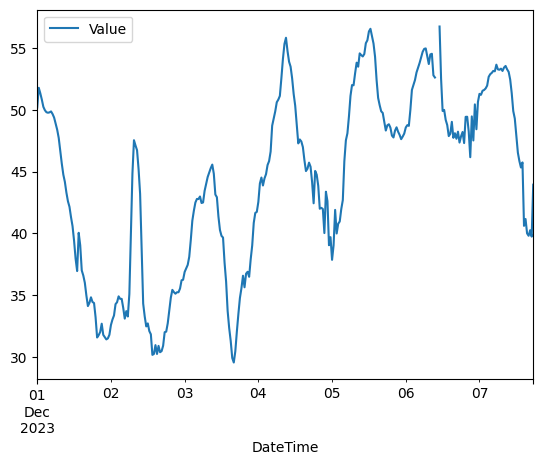

In [11]:
df_resampled_humidity.plot()

## Power

In [12]:
df_power = pd.read_csv(r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\Power_DEC23_1-15.csv") 
df_power['Value'] = df_power['Value'].str.replace(",", ".")
df_power['Value'] = df_power['Value'].astype(float)
df_power['DateTime'] = pd.to_datetime(df_power['DateTime'])
# df_temp['Data'] = pd.to_datetime(df_temp['DateTime'].dt.date)
# df_temp['Orario'] = df_temp['DateTime'].dt.time
# df_temp = df_temp.drop("DateTime", axis=1)
df_power = df_power.reindex(columns=df_power.columns[::-1])
df_power.set_index(df_power['DateTime'], inplace=True)
# df_temp = df_temp[['Data', 'Orario', 'TagName', 'Value', 'DateTime']]

df_power.head(20)  

TagName      Value  \
DateTime                                                  
2023-12-01 00:00:00.000  Power_S_9_7_0_W4.CV  49.820000   
2023-12-01 00:00:00.000  Power_S_9_7_0_W2.CV   1.470000   
2023-12-01 00:00:00.826  Power_S_9_7_0_W4.CV  50.000000   
2023-12-01 00:00:01.826  Power_S_9_7_0_W4.CV  50.650002   
2023-12-01 00:00:02.825  Power_S_9_7_0_W4.CV  50.740002   
2023-12-01 00:00:03.828  Power_S_9_7_0_W4.CV  50.959999   
2023-12-01 00:00:04.826  Power_S_9_7_0_W4.CV  51.189999   
2023-12-01 00:00:05.828  Power_S_9_7_0_W4.CV  51.240002   
2023-12-01 00:00:06.824  Power_S_9_7_0_W4.CV  51.310001   
2023-12-01 00:00:08.824  Power_S_9_7_0_W4.CV  51.389999   
2023-12-01 00:00:09.825  Power_S_9_7_0_W4.CV  51.480000   
2023-12-01 00:00:10.825  Power_S_9_7_0_W4.CV  51.590000   
2023-12-01 00:00:11.826  Power_S_9_7_0_W4.CV  51.570000   
2023-12-01 00:00:12.825  Power_S_9_7_0_W4.CV  51.709999   
2023-12-01 00:00:13.827  Power_S_9_7_0_W4.CV  51.700001   
2023-12-01 00:00:14.828  Power_S_9_7_0_W4.CV  51.580002   
2023-12-01 00:00:15.828  Power_S_9_7_0_W4.CV  51.740002   
2023-12-01 00:00:16.825  Power_S_9_7_0_W4.CV  51.830002   
2023-12-01 00:00:17.827  Power_S_9_7_0_W4.CV  51.680000   
2023-12-01 00:00:18.825  Power_S_9_7_0_W4.CV  51.730000   

                                       DateTime  
DateTime                                         
2023-12-01 00:00:00.000 2023-12-01 00:00:00.000  
2023-12-01 00:00:00.000 2023-12-01 00:00:00.000  
2023-12-01 00:00:00.826 2023-12-01 00:00:00.826  
2023-12-01 00:00:01.826 2023-12-01 00:00:01.826  
2023-12-01 00:00:02.825 2023-12-01 00:00:02.825  
2023-12-01 00:00:03.828 2023-12-01 00:00:03.828  
2023-12-01 00:00:04.826 2023-12-01 00:00:04.826  
2023-12-01 00:00:05.828 2023-12-01 00:00:05.828  
2023-12-01 00:00:06.824 2023-12-01 00:00:06.824  
2023-12-01 00:00:08.824 2023-12-01 00:00:08.824  
2023-12-01 00:00:09.825 2023-12-01 00:00:09.825  
2023-12-01 00:00:10.825 2023-12-01 00:00:10.825  
2023-12-01 00:00:11.826 2023-12-01 00:00:11.826  
2023-12-01 00:00:12.825 2023-12-01 00:00:12.825  
2023-12-01 00:00:13.827 2023-12-01 00:00:13.827  
2023-12-01 00:00:14.828 2023-12-01 00:00:14.828  
2023-12-01 00:00:15.828 2023-12-01 00:00:15.828  
2023-12-01 00:00:16.825 2023-12-01 00:00:16.825  
2023-12-01 00:00:17.827 2023-12-01 00:00:17.827  
2023-12-01 00:00:18.825 2023-12-01 00:00:18.825

## Demand Calculation

In [13]:
# Paths
active_power_w4_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\powers\ACT_Power_W4_DEC_2023.csv"
reactive_power_w4_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\powers\REC_Power_W4_DEC_2023.csv"
active_power_w2_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\powers\ACT_Power_W2_DEC_2023.csv"
reactive_power_w2_path = r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\powers\REC_Power_W2_DEC_2023.csv"

In [14]:
ac_w4_dataset = pd.read_csv(active_power_w4_path, sep=",")
rc_w4_dataset = pd.read_csv(reactive_power_w4_path, sep=",")
ac_w2_dataset = pd.read_csv(active_power_w2_path, sep=",")
rc_w2_dataset = pd.read_csv(reactive_power_w2_path, sep=",")
print("Done")

Done


In [15]:
# Value Conversion
ac_w4_dataset['Value'] = ac_w4_dataset['Value'].str.replace(",", ".").astype(float)
rc_w4_dataset['Value'] = rc_w4_dataset['Value'].str.replace(",", ".").astype(float)
ac_w2_dataset['Value'] = ac_w2_dataset['Value'].str.replace(",", ".").astype(float)
rc_w2_dataset['Value'] = rc_w2_dataset['Value'].str.replace(",", ".").astype(float)
print("Done")

Done


In [16]:
# Conversion to Datetime
ac_w4_dataset['DateTime'] = pd.to_datetime(ac_w4_dataset['DateTime'], dayfirst=False, format="mixed")
rc_w4_dataset['DateTime'] = pd.to_datetime(rc_w4_dataset['DateTime'], dayfirst=False, format="mixed")
ac_w2_dataset['DateTime'] = pd.to_datetime(ac_w2_dataset['DateTime'], dayfirst=False, format="mixed")
rc_w2_dataset['DateTime'] = pd.to_datetime(rc_w2_dataset['DateTime'], dayfirst=False, format="mixed")
print("Done")

Done


In [17]:
# Renaming Datasets
new_names_ac_w4 = {"Value": "Power_P_1_7_0_W4.CV"}
new_names_rc_w4 = {"Value": "Power_Q_3_7_0_W4.CV"}
new_names_ac_w6 = {"Value": "Power_P_1_7_0_W2.CV"}
new_names_rc_w6 = {"Value": "Power_Q_3_7_0_W2.CV"}

ac_w4_dataset = ac_w4_dataset.rename(columns=new_names_ac_w4)
rc_w4_dataset = rc_w4_dataset.rename(columns=new_names_rc_w4)
ac_w2_dataset = ac_w2_dataset.rename(columns=new_names_ac_w6)
rc_w2_dataset = rc_w2_dataset.rename(columns=new_names_rc_w6)
print("Done")

Done


In [18]:
# Indexing
ac_w4_dataset.set_index(ac_w4_dataset['DateTime'], inplace=True, drop=True)
rc_w4_dataset.set_index(rc_w4_dataset['DateTime'], inplace=True, drop=True)
ac_w2_dataset.set_index(ac_w2_dataset['DateTime'], inplace=True, drop=True)
rc_w2_dataset.set_index(rc_w2_dataset['DateTime'], inplace=True, drop=True)
print("Done")

Done


In [19]:
#dropping useless columns
ac_w4_dataset = ac_w4_dataset.drop(["DateTime", "TagName"], axis=1)
rc_w4_dataset = rc_w4_dataset.drop(["DateTime", "TagName"], axis=1)
ac_w2_dataset = ac_w2_dataset.drop(["DateTime", "TagName"], axis=1)
rc_w2_dataset = rc_w2_dataset.drop(["DateTime", "TagName"], axis=1)

c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


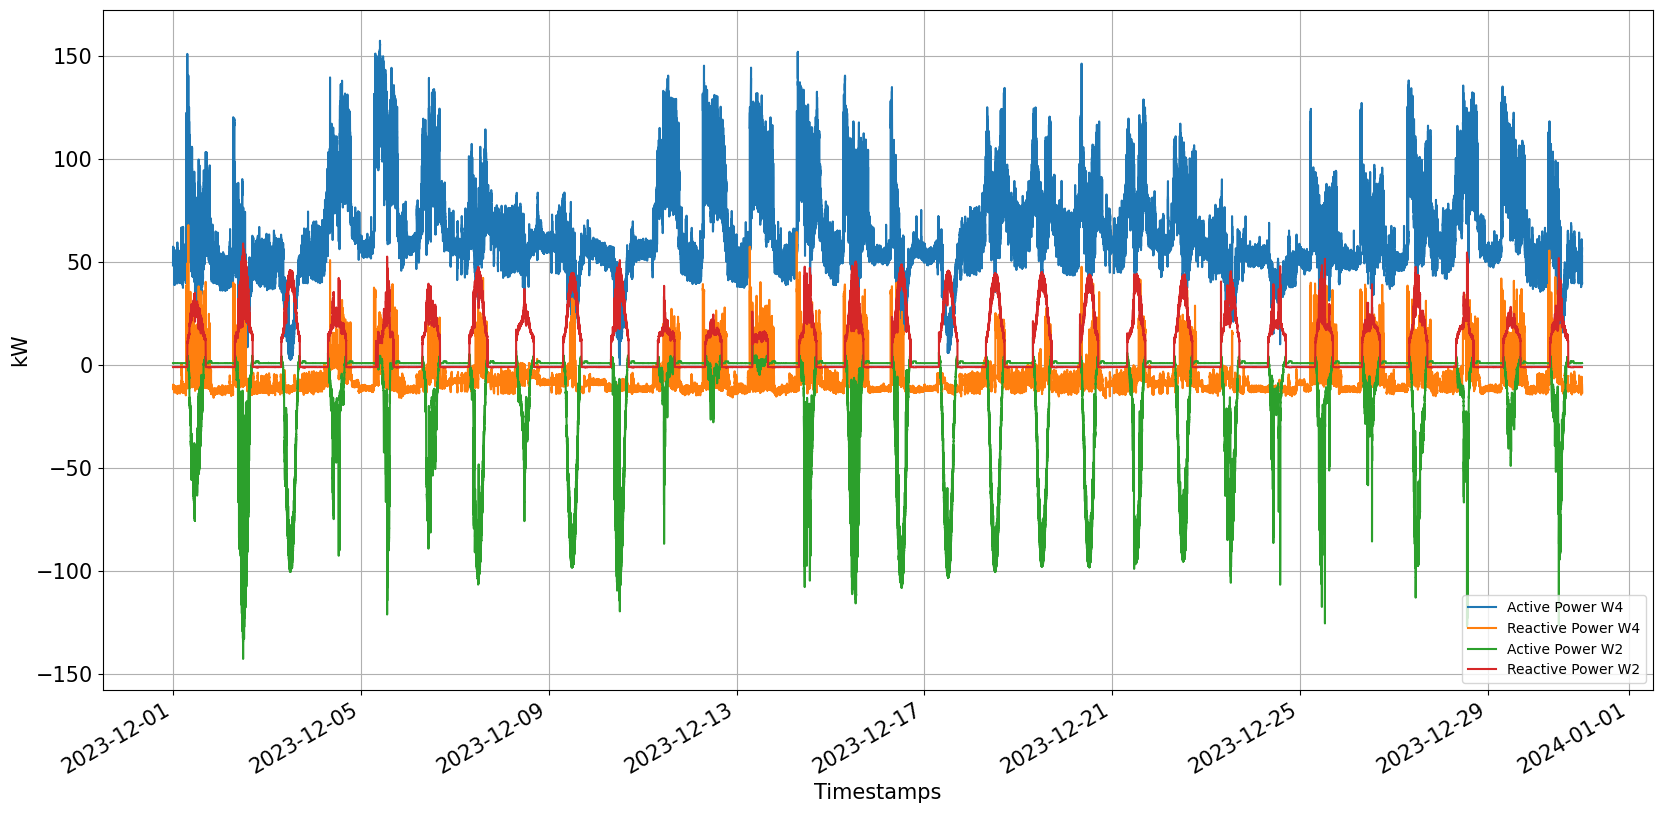

In [20]:
plt.figure(figsize=(20, 10))
ac_w4_dataset['Power_P_1_7_0_W4.CV'].plot(label="Active Power W4")
rc_w4_dataset['Power_Q_3_7_0_W4.CV'].plot(label="Reactive Power W4")
ac_w2_dataset['Power_P_1_7_0_W2.CV'].plot(label="Active Power W2")
rc_w2_dataset['Power_Q_3_7_0_W2.CV'].plot(label="Reactive Power W2")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("kW", fontsize=15)
plt.legend()
plt.grid(True)

In [21]:
# Dataset Creation
dataset = pd.concat([ac_w4_dataset, rc_w4_dataset, ac_w2_dataset, rc_w2_dataset], ignore_index=False)

In [22]:
dataset.head(10)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                            
2023-12-01 00:00:00.000            48.250000                  NaN   
2023-12-01 00:00:00.826            48.430000                  NaN   
2023-12-01 00:00:01.826            49.099998                  NaN   
2023-12-01 00:00:02.825            49.200001                  NaN   
2023-12-01 00:00:03.828            49.430000                  NaN   
2023-12-01 00:00:04.826            49.680000                  NaN   
2023-12-01 00:00:05.828            49.730000                  NaN   
2023-12-01 00:00:06.824            49.810001                  NaN   
2023-12-01 00:00:08.824            49.880001                  NaN   
2023-12-01 00:00:09.825            49.980000                  NaN   

                         Power_P_1_7_0_W2.CV  Power_Q_3_7_0_W2.CV  
DateTime                                                           
2023-12-01 00:00:00.000                  NaN                  NaN  
2023-12-01 00:00:00.826                  NaN                  NaN  
2023-12-01 00:00:01.826                  NaN                  NaN  
2023-12-01 00:00:02.825                  NaN                  NaN  
2023-12-01 00:00:03.828                  NaN                  NaN  
2023-12-01 00:00:04.826                  NaN                  NaN  
2023-12-01 00:00:05.828                  NaN                  NaN  
2023-12-01 00:00:06.824                  NaN                  NaN  
2023-12-01 00:00:08.824                  NaN                  NaN  
2023-12-01 00:00:09.825                  NaN                  NaN

In [23]:
# Null count before resampling
total_values = dataset.count()
total_count = total_values.sum()
null_counts = dataset.isnull().sum()
null_percentages = (null_counts / total_count) * 100
print(f"The dataset has {total_count} elements, with the following percentages of null values:\n{null_percentages}")

The dataset has 6411381 elements, with the following percentages of null values:
Power_P_1_7_0_W4.CV    62.455858
Power_Q_3_7_0_W4.CV    66.717358
Power_P_1_7_0_W2.CV    85.049149
Power_Q_3_7_0_W2.CV    85.777635
dtype: float64


In [24]:
dataset_resampled = dataset.resample("30T").mean()

In [25]:
dataset_resampled = dataset_resampled.dropna()

In [26]:
dataset_resampled.head(10)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2023-12-01 00:00:00            52.715127           -11.119251   
2023-12-01 00:30:00            44.173432           -12.214431   
2023-12-01 01:00:00            46.731352           -11.558736   
2023-12-01 01:30:00            45.236389           -11.827350   
2023-12-01 02:00:00            45.844714           -11.716727   
2023-12-01 02:30:00            45.607947           -11.925431   
2023-12-01 03:00:00            44.321589           -12.023604   
2023-12-01 03:30:00            44.183263           -11.875514   
2023-12-01 04:00:00            51.378389            -9.114007   
2023-12-01 04:30:00            49.135701            -9.265098   

                     Power_P_1_7_0_W2.CV  Power_Q_3_7_0_W2.CV  
DateTime                                                       
2023-12-01 00:00:00             0.827931            -1.074355  
2023-12-01 00:30:00             0.830263            -1.075465  
2023-12-01 01:00:00             0.831250            -1.085116  
2023-12-01 01:30:00             0.832500            -1.085170  
2023-12-01 02:00:00             0.833571            -1.087000  
2023-12-01 02:30:00             0.830714            -1.084978  
2023-12-01 03:00:00             0.825000            -1.085055  
2023-12-01 03:30:00             0.831667            -1.089133  
2023-12-01 04:00:00             0.826250            -1.092477  
2023-12-01 04:30:00             0.825000            -1.095071

In [27]:
# Null count after resampling
total_values = dataset_resampled.count()
total_count = total_values.sum()

null_counts = dataset_resampled.isnull().sum()
null_percentages = (null_counts / total_count) * 100
print(f"The dataset has {total_count} elements, with the following percentages of null values:\n{null_percentages}")

The dataset has 5580 elements, with the following percentages of null values:
Power_P_1_7_0_W4.CV    0.0
Power_Q_3_7_0_W4.CV    0.0
Power_P_1_7_0_W2.CV    0.0
Power_Q_3_7_0_W2.CV    0.0
dtype: float64


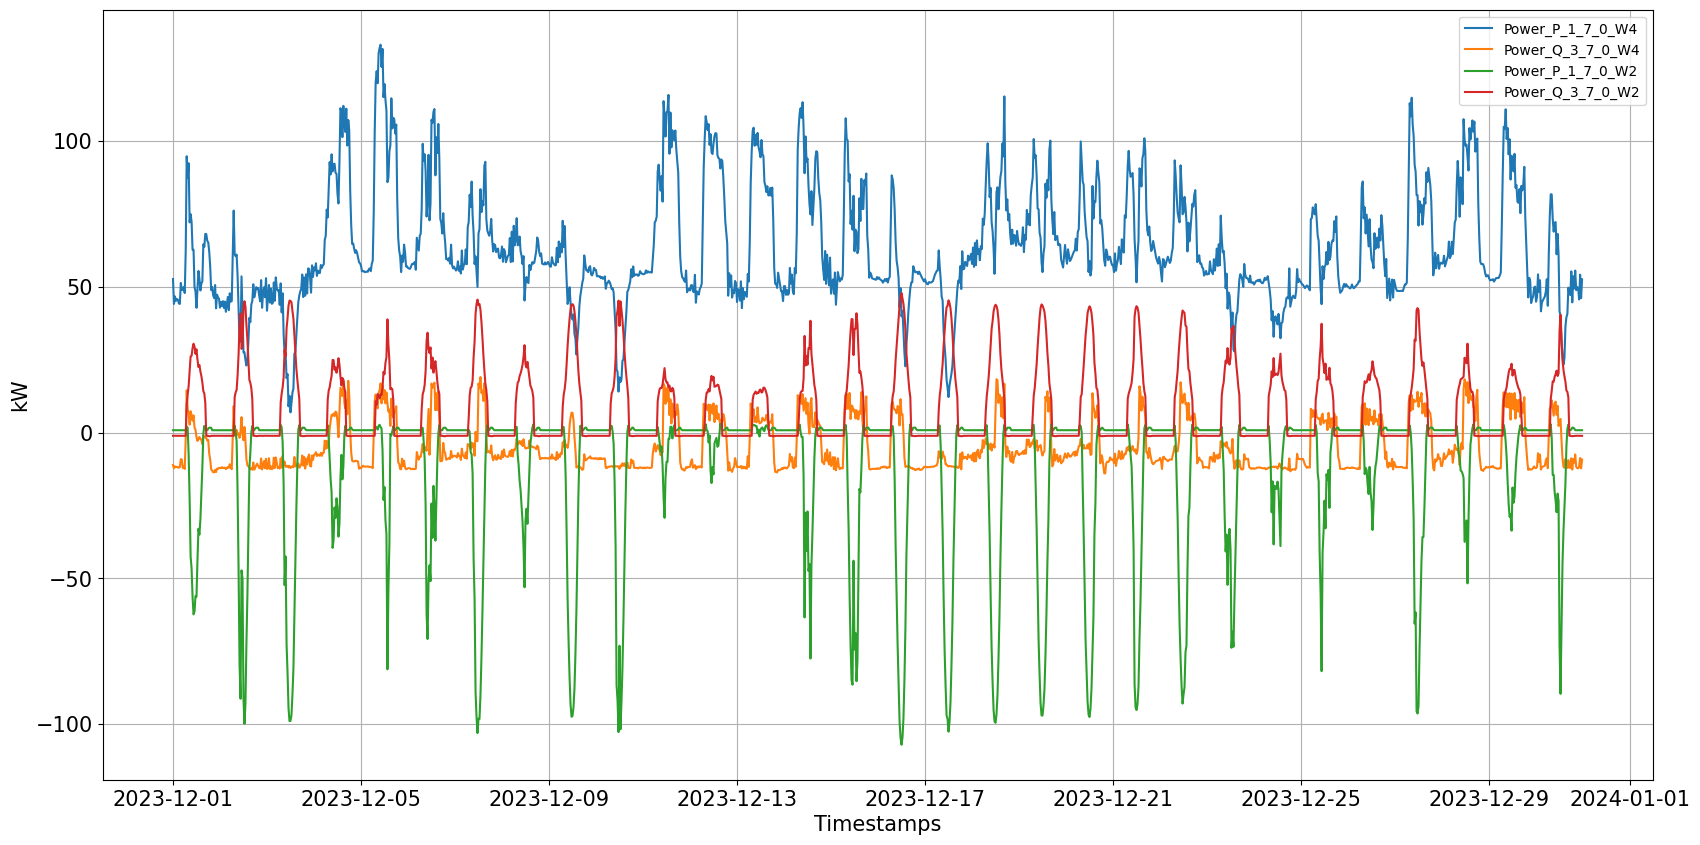

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(dataset_resampled['Power_P_1_7_0_W4.CV'], label = "Power_P_1_7_0_W4")
plt.plot(dataset_resampled['Power_Q_3_7_0_W4.CV'], label = "Power_Q_3_7_0_W4")
plt.plot(dataset_resampled['Power_P_1_7_0_W2.CV'], label = "Power_P_1_7_0_W2")
plt.plot(dataset_resampled['Power_Q_3_7_0_W2.CV'], label = "Power_Q_3_7_0_W2")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("kW", fontsize=15)
plt.legend()
plt.grid(True)

### Calc Apparent Power

In [29]:
def calc_apparent_power(active_power, reactive_power):
    
    active = active_power**2
    reactive = reactive_power**2
    
    apparent_power = math.sqrt(reactive + active)
    
    return apparent_power

In [30]:
dataset_resampled['APP_W4'] = dataset_resampled.apply(lambda row: calc_apparent_power(row["Power_P_1_7_0_W4.CV"], row['Power_Q_3_7_0_W4.CV']), axis=1)
dataset_resampled['APP_W2'] = dataset_resampled.apply(lambda row: calc_apparent_power(row["Power_P_1_7_0_W2.CV"], row['Power_Q_3_7_0_W2.CV']), axis=1)

In [31]:
dataset_resampled.head(10)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2023-12-01 00:00:00            52.715127           -11.119251   
2023-12-01 00:30:00            44.173432           -12.214431   
2023-12-01 01:00:00            46.731352           -11.558736   
2023-12-01 01:30:00            45.236389           -11.827350   
2023-12-01 02:00:00            45.844714           -11.716727   
2023-12-01 02:30:00            45.607947           -11.925431   
2023-12-01 03:00:00            44.321589           -12.023604   
2023-12-01 03:30:00            44.183263           -11.875514   
2023-12-01 04:00:00            51.378389            -9.114007   
2023-12-01 04:30:00            49.135701            -9.265098   

                     Power_P_1_7_0_W2.CV  Power_Q_3_7_0_W2.CV     APP_W4  \
DateTime                                                                   
2023-12-01 00:00:00             0.827931            -1.074355  53.875063   
2023-12-01 00:30:00             0.830263            -1.075465  45.831042   
2023-12-01 01:00:00             0.831250            -1.085116  48.139626   
2023-12-01 01:30:00             0.832500            -1.085170  46.757001   
2023-12-01 02:00:00             0.833571            -1.087000  47.318278   
2023-12-01 02:30:00             0.830714            -1.084978  47.141285   
2023-12-01 03:00:00             0.825000            -1.085055  45.923527   
2023-12-01 03:30:00             0.831667            -1.089133  45.751378   
2023-12-01 04:00:00             0.826250            -1.092477  52.180495   
2023-12-01 04:30:00             0.825000            -1.095071  50.001592   

                       APP_W2  
DateTime                       
2023-12-01 00:00:00  1.356358  
2023-12-01 00:30:00  1.358662  
2023-12-01 01:00:00  1.366914  
2023-12-01 01:30:00  1.367717  
2023-12-01 02:00:00  1.369821  
2023-12-01 02:30:00  1.366479  
2023-12-01 03:00:00  1.363073  
2023-12-01 03:30:00  1.370358  
2023-12-01 04:00:00  1.369743  
2023-12-01 04:30:00  1.371060

### Demand

In [32]:
def calculate_demand(W2, W4):
    
    demand = (W2/(185*60)) + W4
    return demand

In [33]:
dataset_resampled['DEMAND'] = dataset_resampled.apply(lambda row: calc_apparent_power(row["APP_W2"], row['APP_W4']), axis=1)

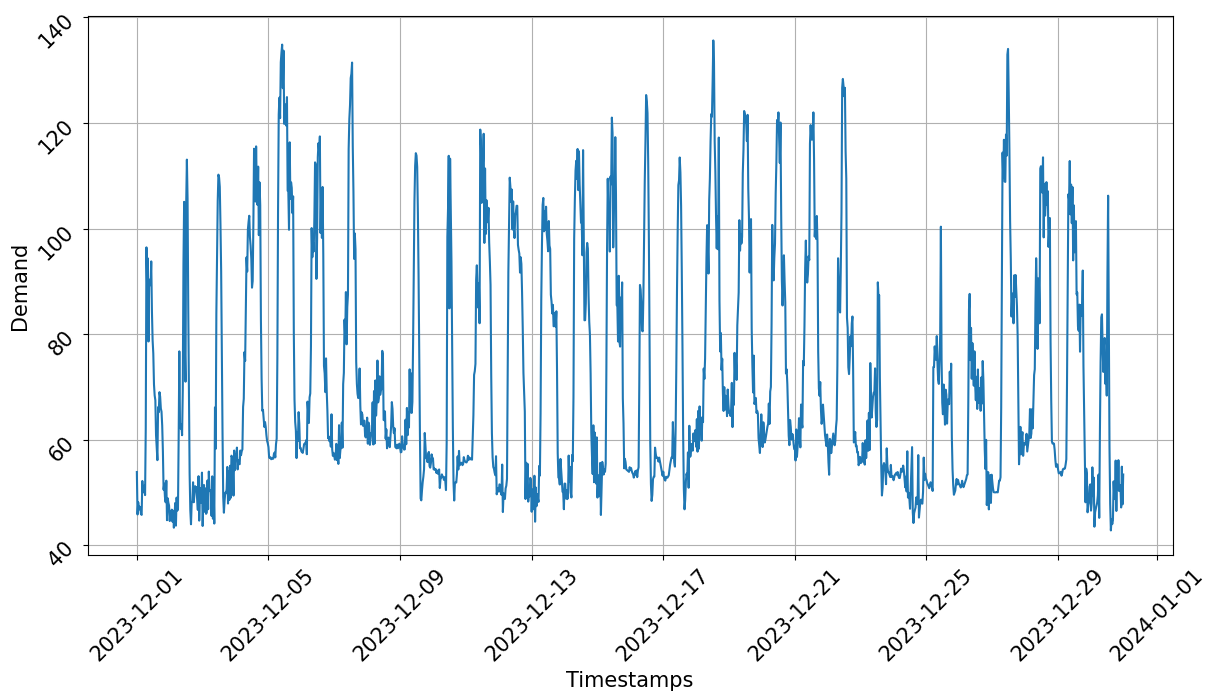

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(dataset_resampled['DEMAND'], label="Demand")
plt.xticks(rotation= 45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.xlabel("Timestamps", fontsize=15)
plt.ylabel("Demand", fontsize=15)
plt.grid(True)
plt.grid(True)
plt.show()

### Old Analysis

In [35]:
df_resampled_power = df_power.resample("30T").mean(numeric_only=True)
df_resampled_power.head(30)

Value
DateTime                      
2023-12-01 00:00:00  48.567383
2023-12-01 00:30:00  38.922112
2023-12-01 01:00:00  44.067841
2023-12-01 01:30:00  42.240760
2023-12-01 02:00:00  42.206586
2023-12-01 02:30:00  41.999749
2023-12-01 03:00:00  41.833643
2023-12-01 03:30:00  40.122392
2023-12-01 04:00:00  47.293807
2023-12-01 04:30:00  44.847197
2023-12-01 05:00:00  49.004014
2023-12-01 05:30:00  42.831657
2023-12-01 06:00:00  45.910199
2023-12-01 06:30:00  56.204171
2023-12-01 07:00:00  78.790193
2023-12-01 07:30:00  56.495757
2023-12-01 08:00:00  61.454833
2023-12-01 08:30:00  55.547468
2023-12-01 09:00:00  65.435602
2023-12-01 09:30:00  65.619960
2023-12-01 10:00:00  64.343807
2023-12-01 10:30:00  67.068335
2023-12-01 11:00:00  59.683037
2023-12-01 11:30:00  56.031037
2023-12-01 12:00:00  53.664123
2023-12-01 12:30:00  51.321184
2023-12-01 13:00:00  50.159018
2023-12-01 13:30:00  49.571969
2023-12-01 14:00:00  44.766710
2023-12-01 14:30:00  42.470366

<Axes: xlabel='DateTime'>

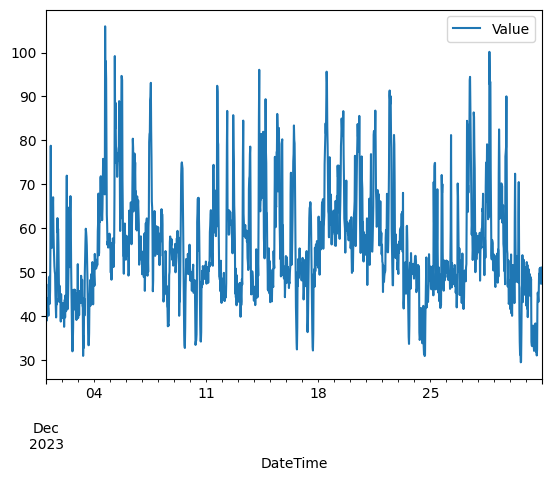

In [36]:
df_resampled_power.plot()

## Noise

In [37]:
df_noise = pd.read_csv(r"C:\Users\annatalini\OneDrive - Engineering Ingegneria Informatica S.p.A\ENERSHARE\forecasting-model\resources\BEMS\Noise_DEC23_1-15.csv") 
df_noise = df_noise.rename(columns= {"Value": "noise"})
df_noise['DateTime'] = pd.to_datetime(df_noise['DateTime'])
df_noise.set_index(df_noise['DateTime'], inplace = True)
df_noise = df_noise[["noise", "TagName", "DateTime"]]
df_noise.head(20)  

noise               TagName                DateTime
DateTime                                                                    
2023-12-01 00:00:00.000     63  med_dB_ENM_001644.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000      0  med_dB_ENM_001643.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000     64  med_dB_ENM_001642.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000      0  med_dB_ENM_001641.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000     61  med_dB_ENM_001640.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000     64  med_dB_ENM_001639.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000     64  med_dB_ENM_001638.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000      0  med_dB_ENM_001637.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000     52  med_dB_ENM_001636.Cv 2023-12-01 00:00:00.000
2023-12-01 00:00:00.000     63  med_dB_ENM_001635.Cv 2023-12-01 00:00:00.000
2023-12-01 00:02:06.828     64  med_dB_ENM_001635.Cv 2023-12-01 00:02:06.828
2023-12-01 00:02:27.836     62  med_dB_ENM_001639.Cv 2023-12-01 00:02:27.836
2023-12-01 00:03:14.829     62  med_dB_ENM_001644.Cv 2023-12-01 00:03:14.829
2023-12-01 00:03:54.831     63  med_dB_ENM_001635.Cv 2023-12-01 00:03:54.831
2023-12-01 00:04:19.829     53  med_dB_ENM_001636.Cv 2023-12-01 00:04:19.829
2023-12-01 00:04:44.830     62  med_dB_ENM_001642.Cv 2023-12-01 00:04:44.830
2023-12-01 00:06:03.830     63  med_dB_ENM_001639.Cv 2023-12-01 00:06:03.830
2023-12-01 00:06:31.834     63  med_dB_ENM_001642.Cv 2023-12-01 00:06:31.834
2023-12-01 00:06:48.839     62  med_dB_ENM_001640.Cv 2023-12-01 00:06:48.839
2023-12-01 00:06:50.829     63  med_dB_ENM_001644.Cv 2023-12-01 00:06:50.829

In [38]:
df_resampled_noise = df_noise.resample("30T").mean(numeric_only=True)
df_resampled_noise.head(30)

noise
DateTime                      
2023-12-01 00:00:00  57.750000
2023-12-01 00:30:00  61.133333
2023-12-01 01:00:00  59.928571
2023-12-01 01:30:00  60.606061
2023-12-01 02:00:00  60.652174
2023-12-01 02:30:00  60.250000
2023-12-01 03:00:00  60.159091
2023-12-01 03:30:00  61.538462
2023-12-01 04:00:00  59.550000
2023-12-01 04:30:00  59.848485
2023-12-01 05:00:00  59.880952
2023-12-01 05:30:00  59.766667
2023-12-01 06:00:00  62.000000
2023-12-01 06:30:00  61.479167
2023-12-01 07:00:00  61.914286
2023-12-01 07:30:00  63.000000
2023-12-01 08:00:00  63.196429
2023-12-01 08:30:00  63.285714
2023-12-01 09:00:00  62.666667
2023-12-01 09:30:00  62.611111
2023-12-01 10:00:00  61.866667
2023-12-01 10:30:00  62.414634
2023-12-01 11:00:00  63.000000
2023-12-01 11:30:00  62.479167
2023-12-01 12:00:00  62.557692
2023-12-01 12:30:00  61.864865
2023-12-01 13:00:00  62.432432
2023-12-01 13:30:00  61.292683
2023-12-01 14:00:00  61.585366
2023-12-01 14:30:00  61.102041

<Axes: xlabel='DateTime'>

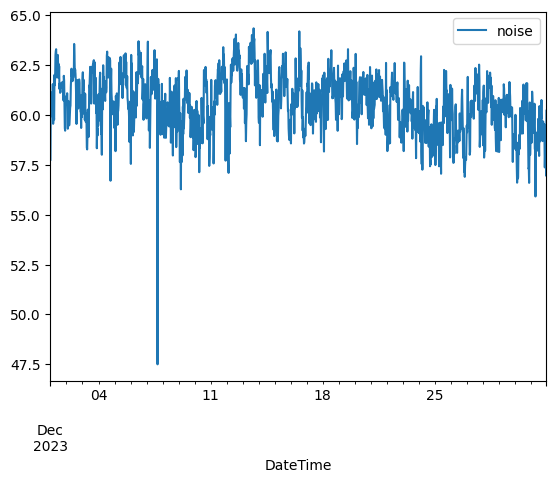

In [39]:
df_resampled_noise.plot()

## Final DF

In [40]:
df_merged = pd.merge(dataset_resampled, df_resampled_humidity, on="DateTime")
df_merged = pd.merge(df_merged, df_resampled_temp, on="DateTime")
df_merged = pd.merge(df_merged, df_resampled_noise, on="DateTime")


df_merged = df_merged.rename(columns={"Value_x": "humidity",
                                      "Value_y": "temperature", 
                                      "Value": "noise"})

df_merged.head(5)

Power_P_1_7_0_W4.CV  Power_Q_3_7_0_W4.CV  \
DateTime                                                        
2023-12-01 00:00:00            52.715127           -11.119251   
2023-12-01 00:30:00            44.173432           -12.214431   
2023-12-01 01:00:00            46.731352           -11.558736   
2023-12-01 01:30:00            45.236389           -11.827350   
2023-12-01 02:00:00            45.844714           -11.716727   

                     Power_P_1_7_0_W2.CV  Power_Q_3_7_0_W2.CV     APP_W4  \
DateTime                                                                   
2023-12-01 00:00:00             0.827931            -1.074355  53.875063   
2023-12-01 00:30:00             0.830263            -1.075465  45.831042   
2023-12-01 01:00:00             0.831250            -1.085116  48.139626   
2023-12-01 01:30:00             0.832500            -1.085170  46.757001   
2023-12-01 02:00:00             0.833571            -1.087000  47.318278   

                       APP_W2     DEMAND   humidity  temperature      noise  
DateTime                                                                     
2023-12-01 00:00:00  1.356358  53.892134  50.194087    17.500690  57.750000  
2023-12-01 00:30:00  1.358662  45.851176  51.788644    18.315000  61.133333  
2023-12-01 01:00:00  1.366914  48.159029  51.348722    18.393046  59.928571  
2023-12-01 01:30:00  1.367717  46.777000  50.833369    18.319465  60.606061  
2023-12-01 02:00:00  1.369821  47.338102  50.247654    18.398039  60.652174

In [54]:
# df_merged['temperature'] = df_merged['temperature']

In [55]:
# df_merged = df_merged.drop(["Power_P_1_7_0_W4.CV", "Power_Q_3_7_0_W4.CV", "Power_P_1_7_0_W2.CV", "Power_Q_3_7_0_W2.CV"], axis = 1)

In [56]:
# df_merged = df_merged.drop(["APP_W4", "APP_W2"], axis = 1)

In [41]:
df_merged['APP_W4_Rolling'] = df_merged['APP_W4'].rolling(window=15).mean()
df_merged['APP_W2_Rolling'] = df_merged['APP_W2'].rolling(window=15).mean()
df_merged['TEMPERATURE_Rolling'] = df_merged['temperature'].rolling(window=15).mean()
df_merged['DEMAND_Rolling'] = df_merged['DEMAND'].rolling(window=15).mean()

In [42]:
df_merged['DEMAND_Diff'] = df_merged['DEMAND'].diff()

<Axes: xlabel='DateTime'>

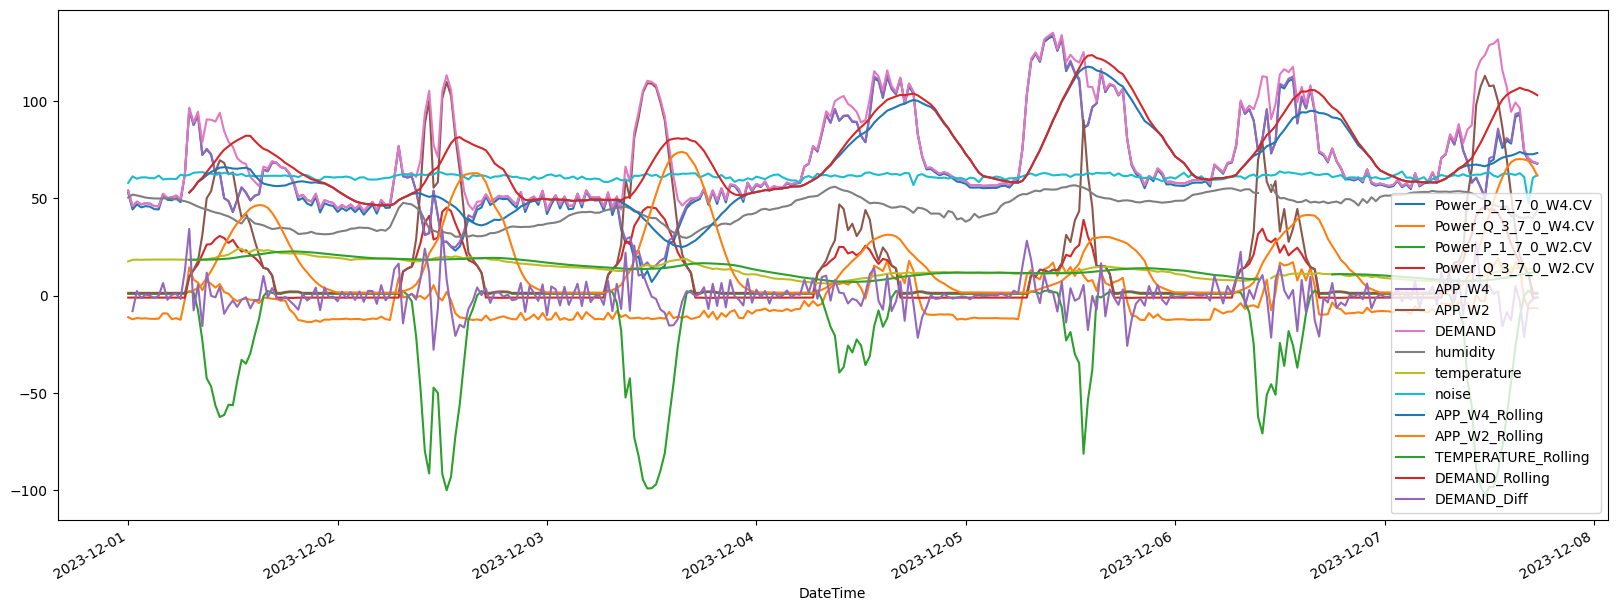

In [43]:
df_merged.plot(figsize=(20, 7.5)) 

In [44]:
# Correlation Matrix

corr = df_merged.corr()
corr.style.background_gradient(cmap='coolwarm')


## LSTM Model

### LSTM Input Definition

In [94]:
## NN Definition

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [78]:
tf.random.set_seed(42)

In [95]:
features = ['Power_P_1_7_0_W4.CV', 'Power_P_1_7_0_W2.CV', 'Power_Q_3_7_0_W4.CV', 'Power_Q_3_7_0_W2.CV', 'temperature', 'noise', 'APP_W4', 'APP_W2', 'humidity']
target = 'DEMAND'

In [96]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_merged[features + [target]])

In [97]:
# 4. Funzione per creare le sequenze temporali per LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :-1])  # features
        y.append(data[i, -1])  # target (DEMAND)
    return np.array(X), np.array(y)

In [98]:
# Definire i passi temporali (time_steps)
time_steps = 10

In [99]:
# Creazione delle sequenze
X, y = create_sequences(scaled_data, time_steps)

In [100]:
# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### LSTM Architecture Definition

In [ ]:
# 5. Creazione del modello LSTM
model = Sequential()

# Strato LSTM con dropout per regolarizzazione
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
# Secondo strato LSTM senza return_sequences perché è l'ultimo LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
# Terzo strato LSTM senza return_sequences perché è l'ultimo LSTM
# model.add(LSTM(units=50, return_sequences=False))
# model.add(Dropout(0.2))

# Strato Dense per output
model.add(Dense(1))

# Compilazione del modello
# optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer="adam", loss='mse')

# Definizione dell'Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#summary
model.summary()

### LSTM Training

In [ ]:
# 6. Addestramento del modello
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

In [ ]:
# 7. Predizione
y_pred = model.predict(X_test)

In [ ]:
X_test

In [104]:
# 8. Inversione dello scaling solo per la colonna 'DEMAND'
# Creazione di uno scaler solo per la colonna 'DEMAND'
scaler_target = MinMaxScaler()
scaler_target.min_, scaler_target.scale_ = scaler.min_[-1], scaler.scale_[-1]

# Gestione di NaN e valori fuori scala
# Controlliamo se ci sono valori fuori dal range [0, 1] prima di invertire la scala
y_pred_clipped = np.clip(y_pred, 0, 1)

# Inversione dello scaling dei valori di test e predetti
y_test_rescaled = scaler_target.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)
y_pred_rescaled = scaler_target.inverse_transform(y_pred).reshape(-1)

In [ ]:
# 9. Verifica di eventuali NaN nelle predizioni dopo la riscalatura
if np.isnan(y_pred_rescaled).any():
    print("Attenzione: sono stati rilevati valori NaN nelle predizioni riscalate.")
    # Eventuale gestione dei NaN, ad esempio sostituirli con la media dei valori non NaN
    y_pred_rescaled = np.nan_to_num(y_pred_rescaled, nan=np.nanmean(y_pred_rescaled))

In [ ]:
y_pred_rescaled

In [ ]:
# 10. Metriche di valutazione
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

### LSTM Evaluation

In [ ]:
# Plot della perdita
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Plot della predizione rispetto ai valori reali
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label='Real DEMAND')
plt.plot(y_pred_rescaled, label='Predicted DEMAND')
plt.title('Real vs Predicted DEMAND')
plt.ylabel('DEMAND')
plt.xlabel('Time Step')
plt.legend()
plt.show()

## MLP

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### MLP Input Definition

In [46]:
features = ['Power_P_1_7_0_W4.CV', 'Power_P_1_7_0_W2.CV', 'Power_Q_3_7_0_W4.CV', 'Power_Q_3_7_0_W2.CV', 'temperature', 'noise', 'APP_W4', 'APP_W2', 'humidity']
target = 'DEMAND'

In [47]:
mlp_scaler = MinMaxScaler()
scaled_data_mlp = mlp_scaler.fit_transform(df_merged[features + [target]])

In [48]:
X_mlp = scaled_data_mlp[:, :-1]  # Le features
y_mlp = scaled_data_mlp[:, -1]   # Il target

In [49]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y_mlp, test_size=0.2, shuffle=False)

In [63]:
print(X_train_mlp.shape)

(256, 9)


### MLP Architecture

In [50]:
# Creazione del modello MLP
mlp = Sequential()
mlp.add(Dense(64, input_dim=X_train_mlp.shape[1], activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(1))

# Compilazione del modello
mlp.compile(optimizer='adam', loss='mse')

#Summary
mlp.summary()

c:\Users\annatalini\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### MLP Training

In [51]:
# Logga i parametri del modello
# mlflow.log_param("optimizer", "adam")
# mlflow.log_param("loss", "mse")
# mlflow.log_param("batch_size", 32)
# mlflow.log_param("epochs", 100)

mlp_history = mlp.fit(X_train_mlp, y_train_mlp, epochs=100, batch_size=32, validation_data=(X_test_mlp, y_test_mlp))

# Logga le metriche
# for epoch, metrics in enumerate(mlp_history.history.items()):
#     for metric_name, metric_values in metrics:
#         mlflow.log_metric(metric_name, metric_values[-1], step=epoch)

# Logga il modello
# mlflow.keras.log_model(mlp, "MLP")

    


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0924 - val_loss: 0.0615
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0500 - val_loss: 0.0386
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0317 - val_loss: 0.0268
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - val_loss: 0.0182
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - val_loss: 0.0154
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0150 - val_loss: 0.0158
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0096 - val_loss: 0.0141
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0092 - val_loss: 0.0147
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064 - val_loss: 0.0146
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0073 - val_loss: 0.0132
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - val_loss: 0.0141
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057 - val_lo

In [52]:
# Predizione
y_pred_mlp = mlp.predict(X_test_mlp)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [53]:
# Inversione della normalizzazione per ottenere i valori originali
mlp_scaler_target = MinMaxScaler()
mlp_scaler_target.min_, mlp_scaler_target.scale_ = mlp_scaler.min_[-1], mlp_scaler.scale_[-1]
y_test_mlp_rescaled = mlp_scaler_target.inverse_transform(y_test_mlp.reshape(-1, 1)).reshape(-1)
y_pred_mlp_rescaled = mlp_scaler_target.inverse_transform(y_pred_mlp).reshape(-1)

### MLP Evaluation

In [54]:
mlp_mse = mean_squared_error(y_test_mlp_rescaled, y_pred_mlp_rescaled)
mlp_mae = mean_absolute_error(y_test_mlp_rescaled, y_pred_mlp_rescaled)
print(f"Mean Squared Error: {mlp_mse}")
print(f"Mean Absolute Error: {mlp_mae}")

mlflow.log_metric("Mean Squared Error", mlp_mse)
mlflow.log_metric("Mean Absolute Error", mlp_mae)

Mean Squared Error: 145.91536621375994
Mean Absolute Error: 7.577879350849433


In [60]:
mlp.save('TrainedModel.h5')

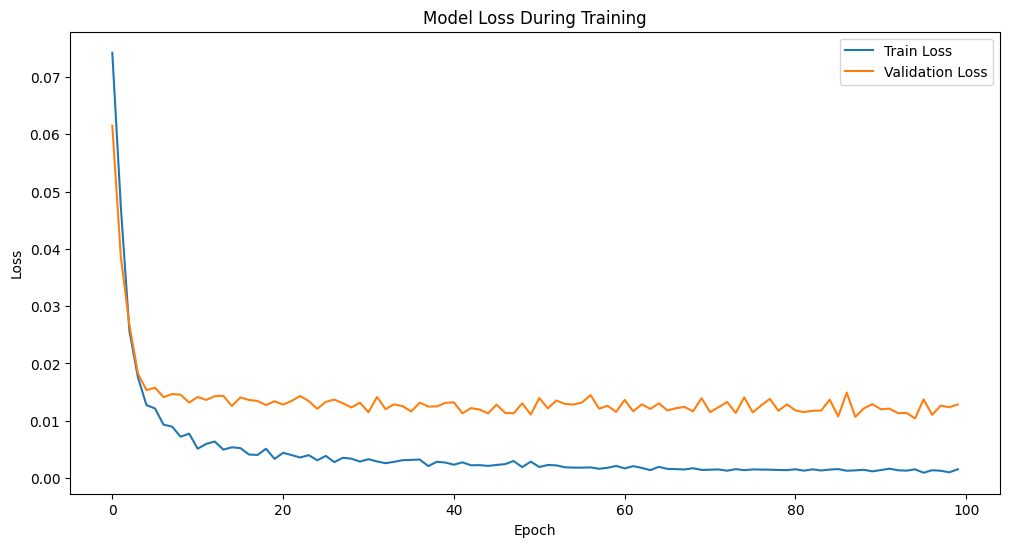

In [55]:
# Plot della perdita
plt.figure(figsize=(12,6))
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

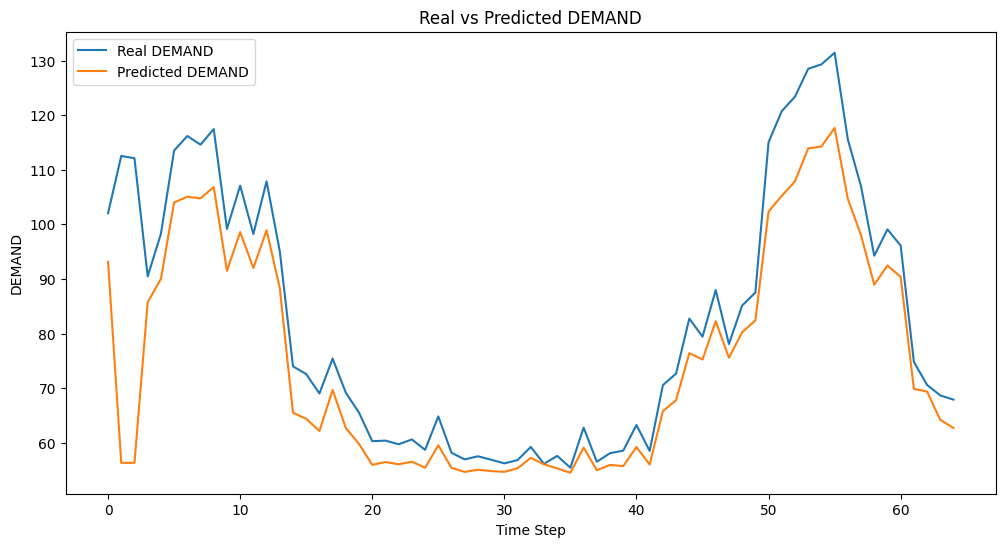

In [56]:
# Plot della predizione rispetto ai valori reali
plt.figure(figsize=(12,6))
plt.plot(y_test_mlp_rescaled, label='Real DEMAND')
plt.plot(y_pred_mlp_rescaled, label='Predicted DEMAND')
plt.title('Real vs Predicted DEMAND')
plt.ylabel('DEMAND')
plt.xlabel('Time Step')
plt.legend()
plt.show()

## GEN AI

In [121]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Transformer Definition

In [151]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.input_embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(model_dim, 1)  # Aggiungiamo self.fc_out come Linear Layer per la predizione finale

    def forward(self, x):
        # x: [batch_size, sequence_len, input_dim]
        x = self.input_embedding(x)  # Passiamo dalla dimensione input a quella del modello
        x = x.permute(1, 0, 2)  # Cambiamo dimensione per il Transformer: [seq_len, batch_size, model_dim]
        transformer_out = self.transformer_encoder(x)  # Output dell'encoder del Transformer
        output = self.fc_out(transformer_out[-1])  # Prendiamo l'ultimo step temporale per la predizione
        return output

### Input Setting

In [141]:
gen_scaler = MinMaxScaler()
gen_scaled_data = gen_scaler.fit_transform(df_merged[features + [target]])

In [142]:
gen_X = scaled_data[:, :-1]  # Le features
gen_y = scaled_data[:, -1]   # Il target (DEMAND)

In [143]:
# Funzione per creare sequenze temporali
def gen_create_sequences(data, target, seq_length):
    Xs, ys = [], []
    for i in range(len(data) - seq_length):
        Xs.append(data[i:i+seq_length])
        ys.append(target[i+seq_length])
    return np.array(Xs), np.array(ys)

In [144]:
seq_length = 10
X_seq_gen, y_seq_gen = gen_create_sequences(gen_X, gen_y, seq_length)

In [145]:
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_seq_gen, y_seq_gen, test_size=0.2, shuffle=False)

### Transformer Architecture

In [146]:
# Convertire i dati in tensori per PyTorch
X_train_tensor = torch.Tensor(X_train)
X_test_tensor = torch.Tensor(X_test)
y_train_tensor = torch.Tensor(y_train).unsqueeze(1)  # Aggiungiamo una dimensione
y_test_tensor = torch.Tensor(y_test).unsqueeze(1)

In [147]:
# Definizione del modello Transformer
input_dim = X_train_tensor.shape[2]
model_dim = 64
num_heads = 4
num_layers = 2

In [148]:
# Definizione del modello Transformer
input_dim = X_train_tensor.shape[2]
model_dim = 64
num_heads = 4
num_layers = 2

In [ ]:
transformer = TimeSeriesTransformer(input_dim=input_dim, model_dim=model_dim, num_heads=num_heads, num_layers=num_layers)

# Definizione della funzione di loss e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Transformer Training

In [ ]:
# Addestramento del modello
epochs = 100
for epoch in range(epochs):
    transformer.train()
    optimizer.zero_grad()
    
    # Predizione e calcolo della loss
    output = transformer(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    
    # Backpropagation e aggiornamento dei pesi
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

### Transformer Evaluation

In [ ]:
# Valutazione sul test set
transformer.eval()
with torch.no_grad():
    test_pred = transformer(X_test_tensor)
    test_loss = criterion(test_pred, y_test_tensor)
    print(f"Test Loss: {test_loss.item()}")

In [160]:
# Inversione della scala per riportare i valori predetti alla scala originale
scaler_target_gen = MinMaxScaler()
scaler_target_gen.min_, scaler_target_gen.scale_ = gen_scaler.min_[-1], gen_scaler.scale_[-1]
y_test_gen_rescaled = scaler_target_gen.inverse_transform(y_test_tensor.numpy())
y_pred_gen_rescaled = scaler_target_gen.inverse_transform(test_pred.numpy())

In [ ]:
# Valutazione finale (MSE e MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_gen = mean_squared_error(y_test_gen_rescaled, y_pred_gen_rescaled)
mae_gen = mean_absolute_error(y_test_gen_rescaled, y_pred_gen_rescaled)
print(f"Mean Squared Error: {mse_gen}")
print(f"Mean Absolute Error: {mae_gen}")